In [1]:
import sys
sys.path.append(r'.\..')

In [ ]:
import pandas as pd
import numpy as np
import os.path as osp
import random as rand
import networkx as nx
import matplotlib.pyplot as plt

from collections import defaultdict

from Dijkstra.algorithms import dijkstra, astar
from Dijkstra.Node import Node

In [3]:
def random_color() -> tuple[int, int, int]:
    return tuple([rand.random() * 255, rand.random() * 255, rand.random() * 255])

In [4]:
csvnodes = pd.read_csv(osp.join('.', 'nodes.csv'))
csvedges = pd.read_csv(osp.join('.', 'edges.csv'))
print(csvnodes.head())
csvedges

   name
0     0
1     1
2     2
3     3
4     4


,Id,node_start,node_end,weight
0,0,0,2,2.00
1,0,0,1,3.00
2,1,2,3,3.02
3,2,3,0,2.09
4,0,3,5,2.50
5,3,1,4,2.00
6,0,1,7,1.50
7,0,4,5,2.00
8,4,5,6,0.00
9,5,7,9,1.00


In [5]:
class MyNode(Node):
    def heuristic(self, other: Node) -> float:
        return 0
    

nodes = {str(row['name']): MyNode(str(int(row['name'])), color=random_color(), weight=rand.random())
                           for _, row in csvnodes.iterrows()}
edges = np.zeros((len(nodes), len(nodes)))

for _, edge in csvedges.iterrows():
    edges[int(edge['node_start']), int(edge['node_end'])] = edge['weight']
    edges[int(edge['node_end']), int(edge['node_start']),] = edge['weight']
    nodes[str(int(edge['node_start']))].neighbours.append(nodes[str(int(edge['node_end']))])

edges = pd.DataFrame(edges, index=list(nodes.keys()), columns=list(nodes.keys()))

print(nodes)
edges

{'0': <__main__.MyNode object at 0x000002D22A9C1970>, '1': <__main__.MyNode object at 0x000002D22A9C18B0>, '2': <__main__.MyNode object at 0x000002D22A9C1A30>, '3': <__main__.MyNode object at 0x000002D22A9C1AF0>, '4': <__main__.MyNode object at 0x000002D22A9C1B50>, '5': <__main__.MyNode object at 0x000002D22A9C1910>, '6': <__main__.MyNode object at 0x000002D22A9C1A90>, '7': <__main__.MyNode object at 0x000002D22A9C1BB0>, '8': <__main__.MyNode object at 0x000002D22A9C1C10>, '9': <__main__.MyNode object at 0x000002D22A9C1C70>}


,0,1,2,3,4,5,6,7,8,9
0,0.00,3.0,2.00,2.09,0.0,0.0,0.0,0.0,1.3,0.0
1,3.00,0.0,0.00,0.00,2.0,0.0,0.0,1.5,0.0,0.0
2,2.00,0.0,0.00,3.02,0.0,0.0,0.0,0.0,0.0,0.0
3,2.09,0.0,3.02,0.00,0.0,2.5,0.0,0.0,0.0,0.0
4,0.00,2.0,0.00,0.00,0.0,2.0,0.0,0.0,0.0,0.0
5,0.00,0.0,0.00,2.50,2.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4.0
7,0.00,1.5,0.00,0.00,0.0,0.0,0.0,0.0,3.0,1.0
8,1.30,0.0,0.00,0.00,0.0,0.0,0.0,3.0,0.0,0.0
9,0.00,0.0,0.00,0.00,0.0,0.0,4.0,1.0,0.0,0.0


In [6]:
path = dijkstra(list(nodes.values()), edges, nodes['0'], nodes['9'], do_UCS=True)
path

0                                              None
1    <__main__.MyNode object at 0x000002D22A9C1970>
2    <__main__.MyNode object at 0x000002D22A9C1970>
3    <__main__.MyNode object at 0x000002D22A9C1A30>
4    <__main__.MyNode object at 0x000002D22A9C18B0>
5    <__main__.MyNode object at 0x000002D22A9C1B50>
6                                              None
7    <__main__.MyNode object at 0x000002D22A9C18B0>
8    <__main__.MyNode object at 0x000002D22A9C1BB0>
9    <__main__.MyNode object at 0x000002D22A9C1BB0>
dtype: object

In [7]:
path = astar(list(nodes.values()), edges, nodes['0'], nodes['9'])
path

0    <__main__.MyNode object at 0x000002D22A9C1AF0>
1    <__main__.MyNode object at 0x000002D22A9C1970>
2    <__main__.MyNode object at 0x000002D22A9C1970>
3    <__main__.MyNode object at 0x000002D22A9C1A30>
4    <__main__.MyNode object at 0x000002D22A9C18B0>
5    <__main__.MyNode object at 0x000002D22A9C1B50>
6                                              None
7    <__main__.MyNode object at 0x000002D22A9C18B0>
8    <__main__.MyNode object at 0x000002D22A9C1BB0>
9    <__main__.MyNode object at 0x000002D22A9C1BB0>
dtype: object

In [8]:
shortest_path = [nodes['9']]
cur = path['9']
while cur != nodes['0']:
    shortest_path.append(cur)
    cur = path[cur.id]
shortest_path.append(nodes['0'])
shortest_path = list(reversed(shortest_path))

In [9]:
for node in shortest_path: print(node.id)

0
1
7
9


In [10]:
temp = defaultdict(list)
for _, edge in csvedges.iterrows():
    temp[int(edge['node_start'])].append(int(edge['node_end']))
temp

defaultdict(list,
            {0: [2, 1],
             2: [3],
             3: [0, 5],
             1: [4, 7],
             4: [5],
             5: [6],
             7: [9, 8],
             8: [0],
             9: [6]})

In [11]:
node_pos = {}

for _, row in csvnodes.iterrows():
    node_pos[int(row['name'])] = (2 + rand.random() * 3, 2 + rand.random() * 3)

node_pos

{0: (2.3838904847996423, 2.6653445224087515),
 1: (4.641715982610636, 2.593756778893029),
 2: (2.617332239792164, 4.44393065027274),
 3: (2.1028079428967406, 4.626462254330077),
 4: (3.9756367080189063, 4.003878856257662),
 5: (3.7765801599648046, 3.075406007557405),
 6: (3.7291696282319435, 4.018962784393038),
 7: (2.1188829706885732, 3.442626978463198),
 8: (3.5697195308596648, 4.85640498940886),
 9: (2.77271724725671, 2.4359428462874892)}

In [16]:
nx_graph = nx.Graph(temp)
edge_labels = {}
for edge in list(nx_graph.edges()):
    edge_labels[edge] = edges[str(edge[1])][str(edge[0])]

In [15]:
edge_colors = {edge: (0, 0, 0) for edge in edge_labels}
highlight_edges = []
for i, node in enumerate(shortest_path):
    if i == (len(shortest_path) - 1): break
    edge_colors[(int(node.id), int(shortest_path[i + 1].id))] = (1, 1, 1)
    highlight_edges.append((int(node.id), int(shortest_path[i + 1].id)))

highlight_edges_color = [(1, 0, 0) for _ in range(len(highlight_edges))]

{(0, 2): Text(2.500608936793141, 3.554619106503816, '2.0'),
 (0, 1): Text(3.5128009919617345, 2.6295507217287275, '3.0'),
 (0, 3): Text(2.243352617525186, 3.6458796408564464, '2.09'),
 (0, 8): Text(2.9767970768645355, 3.7608601018368795, '1.3'),
 (2, 3): Text(2.360067067188398, 4.535197525144925, '3.02'),
 (3, 5): Text(2.93967911587149, 3.8509479714725106, '2.5'),
 (1, 4): Text(4.308683277477109, 3.298803141852005, '2.0'),
 (1, 7): Text(3.380294049653787, 3.0181937047264498, '1.5'),
 (4, 5): Text(3.876110817590509, 3.5396535498870945, '2.0'),
 (5, 6): Text(3.752874733221458, 3.547187597721712, '0.0'),
 (7, 9): Text(2.445805913451561, 2.9392759754366833, '1.0'),
 (7, 8): Text(2.8443053055469374, 4.149519935138259, '3.0'),
 (9, 6): Text(3.250941866544988, 3.2274502148554634, '4.0')}

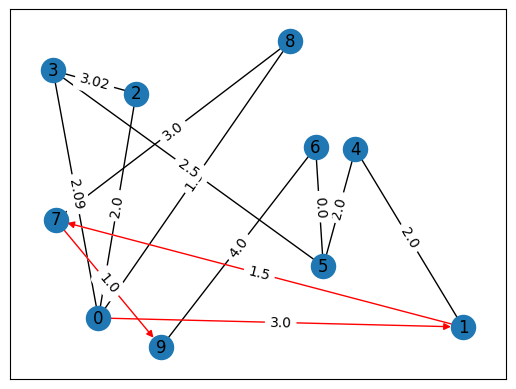

In [14]:
my_ax = plt.subplot()
# nx.draw_networkx(nx_graph, ax=my_ax)
nx.draw_networkx_nodes(nx_graph, node_pos, ax=my_ax)
nx.draw_networkx_labels(nx_graph, node_pos, ax=my_ax)
nx.draw_networkx_edges(nx_graph, node_pos,
                       edgelist=list(edge_colors.keys()), edge_color=list(edge_colors.values()), ax=my_ax)
nx.draw_networkx_edges(nx_graph, node_pos, highlight_edges,
                       edge_color=highlight_edges_color,
                       arrows=True, arrowstyle='-|>', ax=my_ax)
nx.draw_networkx_edge_labels(nx_graph, node_pos, edge_labels=edge_labels, ax=my_ax)

# plt.show() 